## Machine Learning Course Feedback Analysis

*Prepared by:*  
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

The term has just ended and I just got feedback from my students, who are mostly senior undergraduate Computer Science students, in the Machine Learning course I'm teaching. It was definitely a challenging course to teach as the field of Machine Learning is rapidly evolving and it has many prerequisites such as calculus, linear algebra, statistics, and programming, among others. In addition, I attempted to teach this course without skipping the nitty-gritty mathematics and actual implementation of some of the core algorithms we use today. Practical aspects and advanced techniques in Machine Learning  were taught as a response to how they conducted their homework and projects as a 1-term course would not be enough to discuss the intricacies of many of the techniques that we use. I believe it is one way of differentiating this with most resources nowadays so that the students won't think this is something they could have simply 'Googled'. Anyway, I think this a good time to reflect on what happened throughout this course, and what better way to do this than using Machine Learning on the feedback I have received? Machine Learning-ception XD.

## Preliminaries

### Import Packages

<!-- Version requirements:
- seaborn >= 0.11 -->

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns

from itertools import chain

%matplotlib inline

sns.set_style('darkgrid')

In [2]:
print(sns.__version__)

0.10.0


In [3]:
FILENAME = "Course Evaluation.csv"

### Read Dataset

We rename the columns first as they are too long and convert the ratings that are currently in text form into 1-5 scale for easing processing later. Note that for the following columns: 'course_rating', 'course_learning', 'instructor_knowledge', 'skill_start', 'skill_end', 'effort', and 'learning_contribution', the ratings are as follows:
- Excellent - 5
- Very good - 4
- Satisfactory - 3
- Fair - 2
- Poor - 1

And for the following columns: 'effective_lecturer', 'clear_presentations', 'stimulated_interest', 'effective_time', 'helpful', 'useful_feedback', 'clear_objectives', 'organized_content', 'appropriate_workload', and 'allow_participation', the ratings are as follows:
- Strongly agree - 5
- Agree - 4
- Neutral - 3
- Disagree - 2
- Strongly Disagree - 1

Both are actually rating systems found in Google Form's evaluation template, which I simply copied and modified by a bit for this evaluation.

`Additional Info: out of the 36 students, 28 have given their feedback`

In [4]:
df = pd.read_csv(FILENAME)
# df.columns = ['timestamp', 'course_rating', 'course_learning', 'instructor_knowledge', 'skill_start', 'skill_end', 'effort', 'learning_contribution',
#               'effective_lecturer', 'clear_presentations', 'stimulated_interest', 'effective_time', 'helpful', 'useful_feedback', 'clear_objectives', 
#                 'organized_content', 'appropriate_workload', 'allow_participation', 'useful_aspects', 'wishlist', 'final_message']

df.rename(columns = {"Timestamp": "timestamp", 
           "How would you rate the course?": "course_rating",
           "Did you learn many things in this course?": "course_learning",
           "Rate the instructor's knowledge in this field": "instructor_knowledge",
           "Contribution to learning [Level of skill/knowledge at start of course]": "skill_start",
           "Contribution to learning [Level of skill/knowledge at end of course]": "skill_end",
           "Contribution to learning [Level of skill/knowledge required to complete the course]": "effort",
           "Contribution to learning [Contribution of course to your skill/knowledge]": "learning_contribution",
           "Skill and responsiveness of the instructor [Instructor was an effective lecturer/demonstrator]": "effective_lecturer",
           "Skill and responsiveness of the instructor [Presentations were clear and organized]": "clear_presentations",
           "Skill and responsiveness of the instructor [Instructor stimulated student interest]": "stimulated_interest",
           "Skill and responsiveness of the instructor [Instructor effectively used time during class periods]": "effective_time",
           "Skill and responsiveness of the instructor [Instructor was available and helpful]": "helpful",
           "Skill and responsiveness of the instructor [Grading was prompt and had useful feedback]": "useful_feedback",
           "Course content [Learning objectives were clear]": "clear_objectives",
           "Course content [Course content was organized and well planned]": "organized_content",
           "Course content [Course workload was appropriate]": "appropriate_workload",
           "Course content [Course organized to allow all students to participate fully]": "allow_participation",
           "What aspects of this course were most useful or valuable?" :"useful_aspects",
           "How would you improve this course (Wishlist)? ": "wishlist",
           "Any final message to me?": "final_message"}, inplace=True)

cols = ['course_rating', 'course_learning', 'instructor_knowledge', 'skill_start', 'skill_end', 'effort', 'learning_contribution']
df[cols] = df[cols].replace({'Excellent': 5,
                             'Very good': 4,
                             'Satisfactory': 3,
                             'Fair': 2,
                             'Poor': 1})

cols = ['effective_lecturer', 'clear_presentations', 'stimulated_interest', 'effective_time', 'helpful', 'useful_feedback', 
        'clear_objectives', 'organized_content', 'appropriate_workload', 'allow_participation']
df[cols] = df[cols].replace({'Strongly agree': 5,
                             'Agree': 4,
                             'Neutral': 3,
                             'Disagree': 2,
                             'Strongly disagree': 1})

df.head()

,timestamp,course_rating,course_learning,instructor_knowledge,skill_start,skill_end,effort,learning_contribution,effective_lecturer,clear_presentations,...,effective_time,helpful,useful_feedback,clear_objectives,organized_content,appropriate_workload,allow_participation,useful_aspects,wishlist,final_message
0,2021/02/09 7:26:23 PM GMT+8,5,4,5,1,4,3,4,5,5,...,4,5,5,4,4,5,4,Learning about machine learning such as the pr...,None,Thank you for the term sir!
1,2021/02/09 7:26:30 PM GMT+8,4,4,4,2,3,3,4,5,4,...,5,5,5,4,4,5,5,Probably the fact that it cleared things up ab...,Probably have more time dedicated to activitie...,Thank you sir for being patient with us and do...
2,2021/02/09 7:28:02 PM GMT+8,4,5,5,2,3,2,3,4,5,...,3,5,5,5,5,4,5,It was really helpful to dive into the objecti...,A heads up on what previous lessons could be a...,Sir would there be any way for us to contact y...
3,2021/02/09 7:28:56 PM GMT+8,4,4,4,2,3,3,4,4,4,...,4,4,4,4,4,4,4,home works,NaN,thank you for the term
4,2021/02/09 7:29:42 PM GMT+8,4,5,4,1,3,4,4,4,4,...,4,5,4,4,3,4,4,Learning on how the machine learning pipeline ...,NaN,Thank you sir for teaching us the entire term!...


## Exploratory Data Analysis

### High-level course ratings, Instructor knowledge, and Learning contribution ratings

Here we show some descriptive statistics on those columns.

In [5]:
cols = ['course_rating', 'course_learning', 'instructor_knowledge']
df[cols].describe().loc[['count', 'mean', 'std']]

,course_rating,course_learning,instructor_knowledge
count,28.000000,28.000000,28.000000
mean,4.285714,4.571429,4.857143
std,0.534522,0.503953,0.356348


In [6]:
cols = ['skill_start', 'skill_end', 'effort', 'learning_contribution']
df[cols].describe().loc[['count', 'mean', 'std']]

,skill_start,skill_end,effort,learning_contribution
count,28.000000,28.000000,28.000000,28.000000
mean,2.285714,3.714286,3.714286,4.142857
std,1.272418,0.854493,0.762896,0.755929


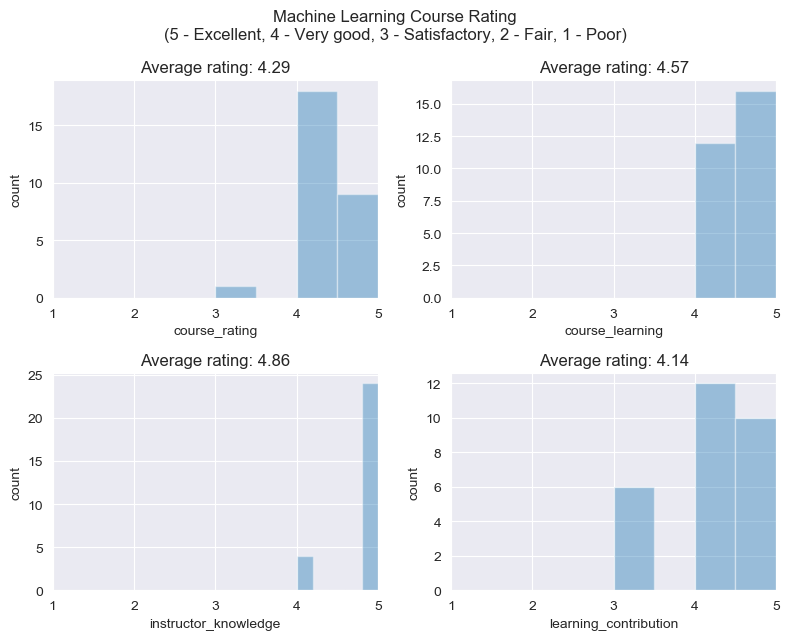

In [7]:
nrows, ncols = (2, 2)
fig, ax = plt.subplots(nrows, ncols, figsize=(8, 6), dpi=100)

cols = ['course_rating', 'course_learning', 'instructor_knowledge', 'learning_contribution']

for curr_ax, col in zip(list(chain(*ax)), cols):
    sns.distplot(df[col], kde=False, ax=curr_ax)
    curr_ax.set_xlim(1, 5)
    curr_ax.set_ylabel('count')
    curr_ax.set_title(f"Average rating: {df[col].mean():.2f}")

figure_title = 'Machine Learning Course Rating\n(5 - Excellent, 4 - Very good, 3 - Satisfactory, 2 - Fair, 1 - Poor)'
plt.suptitle(figure_title, y=1.06)
plt.tight_layout()
plt.show()


As can be seen in the graphs above, students generally have great feedback for this course. The highest here is the `instructor_knowledge` feature.

### Perceived improvement in skill throughout the term

In hindsight, I realized that the default questions I got from Google Forms for `Contribution to learning [Level of skill/knowledge at start of course` and `Contribution to learning [Level of skill/knowledge at end of course]` are ambiguous. Some might interpret the former to be the students' skill level prior to starting the course, some might interpret it as the learnings that they got from me in the first few sessions of this course. I was initially thinking of the former. I realized the ambiguity when I saw some feedback having `Excellent` marks on both items. To give context, the class has little to no ML background prior to this course. Thus, the results of statistical test below will be a more conservative estimate of the perceived improvement of the students.

Let's first look at the change in average perceived skill.

In [8]:
cols = ['skill_start', 'skill_end']
df[cols].describe().loc[['count', 'mean', 'std']]

,skill_start,skill_end
count,28.000000,28.000000
mean,2.285714,3.714286
std,1.272418,0.854493


Note that the rating system for the features of interest here are the following:
- Excellent - 5
- Very good - 4
- Satisfactory - 3
- Fair - 2
- Poor - 1

It seems like there is a noticeable increase in skill, but let's compare if they are truly statistically significant. We will be using Wilcoxon signed-ranked test as it is non-parametric, which is suited for ordinal data, and because our data comes from the same group. Our hypothesis is that there is an increase in skill. Let's set our alpha value to 0.05 ($\alpha = 0.05$). We then reject the null hypothesis (no change) if the p-value we get is lower than that.

In [9]:
from scipy.stats import wilcoxon

wilcoxon(df['skill_start'], df['skill_end'])

WilcoxonResult(statistic=6.0, pvalue=1.6267401626169193e-05)

In [10]:
alpha = 0.05
test_statistic, p = wilcoxon(df['skill_start'], df['skill_end'])

if p > alpha:
    print("Null hypothesis: No change in the distribution.")
else:
    print("Alternative hypothesis: There is a noticeable change in the distribution.")

Alternative hypothesis: There is a noticeable change in the distribution.


We got 2.29 for the initial skill level and 3.71 for the final skill level. As the statistical test shows, the students' perceived skill did improve throughout the term. The final skill level should not be confused with the 4.14 in the `learning_contribution` as a student may have learned a lot but they might still feel that they have much to learn, which is something that I expect.

### Instructor-specific ratings

For the following features, we use a different ranking system compared to the ones before.
- Strongly agree - 5
- Agree - 4
- Neutral - 3
- Disagree - 2
- Strongly Disagree - 1


In [11]:
cols = ['effective_lecturer', 'clear_presentations', 'stimulated_interest', 'effective_time', 'helpful', 'useful_feedback', 
        'clear_objectives', 'organized_content', 'appropriate_workload', 'allow_participation']
df[cols].describe().loc[['count', 'mean', 'std']]

,effective_lecturer,clear_presentations,stimulated_interest,effective_time,helpful,useful_feedback,clear_objectives,organized_content,appropriate_workload,allow_participation
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,4.357143,4.321429,4.107143,4.428571,4.857143,4.607143,4.392857,4.428571,4.607143,4.428571
std,0.678467,0.669636,0.831745,0.690066,0.356348,0.566947,0.685257,0.572750,0.497347,0.634126


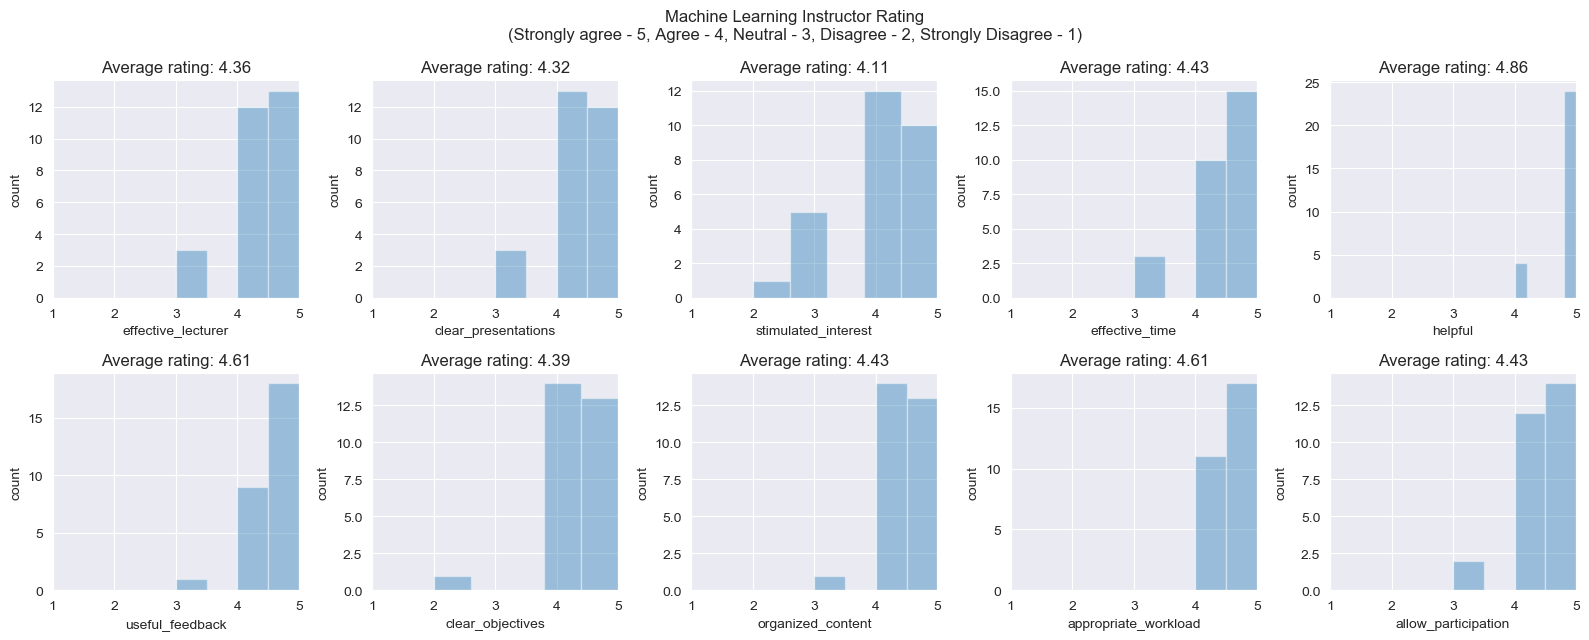

In [12]:
nrows, ncols = (2, 5)
fig, ax = plt.subplots(nrows, ncols, figsize=(16, 6), dpi=100)

cols = ['effective_lecturer', 'clear_presentations', 'stimulated_interest', 'effective_time', 'helpful', 'useful_feedback', 
        'clear_objectives', 'organized_content', 'appropriate_workload', 'allow_participation']

for curr_ax, col in zip(list(chain(*ax)), cols):
    sns.distplot(df[col], kde=False, ax=curr_ax)
    curr_ax.set_xlim(1, 5)
    curr_ax.set_ylabel('count')
    curr_ax.set_title(f"Average rating: {df[col].mean():.2f}")

figure_title = 'Machine Learning Instructor Rating\n(Strongly agree - 5, Agree - 4, Neutral - 3, Disagree - 2, Strongly Disagree - 1)'
plt.suptitle(figure_title, y=1.06)
plt.tight_layout()
plt.show()

Similar with the other ratings above, the students have good ratings here. The highest here are `helpful`, `useful_feedback`, and `appropriate_workload` features.

## Topic Modeling on the students' comments

In this section, we will be clustering the students' responses to different questions. The methodology for the clustering below is inspired by this article: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/


Run the following in the command line since this is one of the dependencies of spacy functions we will be using later.
```
python -m spacy download en_core_web_sm
```

In [13]:
import re, nltk, spacy, string

In [14]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import pyLDAvis.gensim
import pyLDAvis

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [15]:
df_comments = df[['useful_aspects', 'wishlist', 'final_message']]
df_comments.head(10)

,useful_aspects,wishlist,final_message
0,Learning about machine learning such as the pr...,None,Thank you for the term sir!
1,Probably the fact that it cleared things up ab...,Probably have more time dedicated to activitie...,Thank you sir for being patient with us and do...
2,It was really helpful to dive into the objecti...,A heads up on what previous lessons could be a...,Sir would there be any way for us to contact y...
3,home works,NaN,thank you for the term
4,Learning on how the machine learning pipeline ...,NaN,Thank you sir for teaching us the entire term!...
5,Learning how to do proper machine learning tec...,NaN,Thank you sir for the wonderful term. Sorry if...
6,NaN,NaN,NaN
7,NaN,NaN,Thank you Sir for your patience with us and ma...
8,cooperative work,NaN,Thank you for this term po sir!
9,I think the most valuable aspect of the course...,If I were to name a few things that can be imp...,"Hi, Sir!! Thank you very much for being our pr..."


### Preprocessing

#### Text Cleaning and Normalization

Before we do the actual modeling, we first need to preprocess the data. Since this is a text data, we have to clean it first and also perform normalization, which in this case is lemmatization.

In [16]:
def clean_text(text:str) -> str:
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')
def lemmatizer(text:str) -> str:        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

def remove_stopwords(texts:list) -> list:
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts:list, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#### Vectorization

We apply Bag-of-words (BoW) representation to our text data to turn it into a format understandable by machine learning models.

Here are the functions for creating our BoW table and the dictionary for topic modeling.

In [17]:
def sent_to_words(sentences:list):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
def tokenize(docs:list) -> tuple:
    # Tokenization
    comments_tokenized = list(sent_to_words(docs))

    # Remove Stop Words
    comments_tokenized = remove_stopwords(comments_tokenized)

    # Create Dictionary
    id2word = corpora.Dictionary(comments_tokenized)

    # Term Document Frequency
    bow = [id2word.doc2bow(text) for text in comments_tokenized]
    
    return comments_tokenized, id2word, bow

In [18]:
def clean_and_normalize_text(comments:list) -> list:
    comments = pd.Series(comments).apply(lambda x: clean_text(x))
    comments = comments.apply(lambda x: lemmatizer(x))
    # handle spacy's PRON
    comments = comments.str.replace('-PRON-', '') 
        
    return comments.tolist()

### Topic Modeling

In the following sections, we will be using Latent Dirichlet Allocation (LDA) for topic modeling. We could configure so many hyperparameters but for now, we will only be playing around with the number of clusters hyperparameter.

#### Finding optimal number of clusters

Functions for finding optimal number of clusters.

In [19]:
from tqdm import tqdm

def get_coherence(lda_model:gensim.models.ldamodel.LdaModel, texts:list, dictionary:gensim.corpora.dictionary.Dictionary):
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

def build_lda_model(num_topics:int, corpus:list, id2word:gensim.corpora.dictionary.Dictionary):
    return gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                   id2word=id2word,
                                                   num_topics=num_topics, 
                                                   random_state=100,
                                                   update_every=1,
                                                   chunksize=100,
                                                   passes=10,
                                                   alpha='auto',
                                                   per_word_topics=True)

def find_k(texts:list, id2word:gensim.corpora.dictionary.Dictionary, bow:list, max_k:int=10) -> pd.DataFrame:
    list_n = []
    list_score = []
    for num_topics in tqdm(range(2, max_k)):
        # Build LDA model
        lda_model = build_lda_model(num_topics, bow, id2word)

        score = get_coherence(lda_model, texts, id2word)
        list_n += [num_topics]
        list_score += [score]
        
    d = np.array([list_n, list_score]).T
    return pd.DataFrame(d, columns=['n_topics', 'score'])

def plot_coherence(df:pd.DataFrame):
    fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
    df.plot(x='n_topics', y='score', ax=ax)
    plt.show()

#### Build model with optimal k

After determining the best k, we choose that model configuration.

In [20]:
def build_optimal_lda(optimal_k:int, texts:list, id2word:gensim.corpora.dictionary.Dictionary, bow:list):
    lda_model = build_lda_model(optimal_k, bow, id2word)
    score = get_coherence(lda_model, texts, id2word)
    print(f'Coherence Score: {score}')

    # Visualize the topics
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow, id2word, mds='tsne', sort_topics=False)
    display(vis)
    # pyLDAvis.save_html(vis, f'{LDA_SAVE_FILE}.html') 
    return lda_model

#### Get most representative comments

We also get the most representative comments per cluster.

In [46]:
def format_topics_sentences(ldamodel, bow, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[bow]):
        row = row[0] # fix
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

def print_representative_documents(sent_topics_sorted, texts:list):
    for topic_no, cluster in sent_topics_sorted.groupby('Topic_Num'):
        print('\n----------')
        print(f'TOPIC {topic_no + 1}')
        print(f"Keywords: {cluster.head(1)['Keywords'].tolist()}\n")
        for index in cluster['Document_No']:
            print(f"Text {index}: {texts[index]}")
            # print(f"Text {index} Keywords: {cluster[cluster['Document_No']==index]['Keywords'].tolist()}")

            
def get_most_representative_documents(comments:list, comments_tokenized:list, lda_model:gensim.models.ldamodel.LdaModel, bow:list) -> pd.DataFrame:
    df_representative_comments = pd.DataFrame(columns=['topic_num','comments'])
    df_topic_sents_keywords = format_topics_sentences(lda_model, bow, comments_tokenized)
    
    # Format
    df_dominant_topic = df_topic_sents_keywords.reset_index()
    df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

    # Group top 5 sentences under each topic
    sent_topics_sorted = pd.DataFrame()
    sent_topics_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
    
    ## Display keywords per cluster
    #display(sent_topics_grpd.head(1)['Topic_Keywords'].tolist())

    for i, grp in sent_topics_grpd:
        grp = grp.reset_index()
        sent_topics_sorted = pd.concat([sent_topics_sorted, grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)], axis=0)

    # Reset Index    
    sent_topics_sorted.reset_index(drop=True, inplace=True)

    # Format
    sent_topics_sorted.columns = ['Document_No', 'Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
    
    print_representative_documents(sent_topics_sorted, comments)

    for topic_no, cluster in sent_topics_sorted.groupby('Topic_Num'):
        topic_no = topic_no + 1
        for index in cluster['Document_No']:
            row = [topic_no, f'Comment {index}: {comments[index]}']
            df_representative_comments.loc[df_representative_comments.shape[0]] = row
            
    return df_representative_comments

### Comment Clusters

#### Useful aspects of this ML course

In [22]:
comments = df_comments['useful_aspects'].dropna().reset_index(drop=True)
comments_cleaned = clean_and_normalize_text(comments)
comments_tokenized, id2word, bow = tokenize(comments_cleaned)

In [23]:
df_lda_clusters = find_k(comments_tokenized, id2word, bow)
df_lda_clusters

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:14<00:00, 16.85s/it]


,n_topics,score
0,2.0,0.362839
1,3.0,0.340898
2,4.0,0.337932
3,5.0,0.364591
4,6.0,0.392087
5,7.0,0.378213
6,8.0,0.437677
7,9.0,0.413152


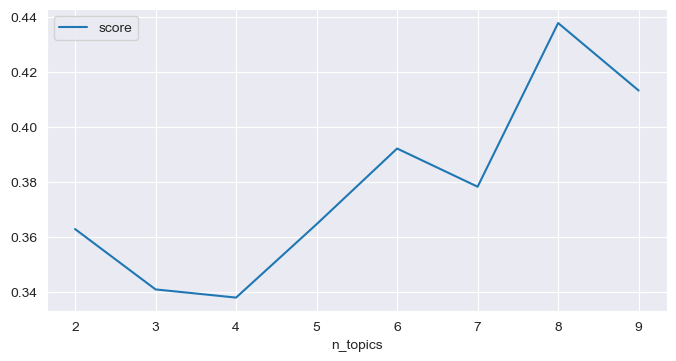

In [24]:
plot_coherence(df_lda_clusters)

It is quite tricky to choose a good cluster value based on the plot above, but we got a noticeable increase in coherence score when `n_topics = 8.` When I tried that, I got a cluster which contains almost nothing, so we will use `n_topics = 6` instead.

In [47]:
optimal_k = 6
lda_model = build_optimal_lda(optimal_k, comments_tokenized, id2word, bow)

Coherence Score: 0.39208696460514897


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0       1.465019 -47.625065       1        1  16.444670
1      54.854797 -36.476795       2        1  28.619316
2      32.212929 -61.444572       3        1  17.355515
3       5.111096 -14.110332       4        1  16.499321
4      26.350170 -33.374702       5        1   9.491440
5      38.109818  -7.222781       6        1  11.589736, topic_info=           Term       Freq      Total Category  logprob  loglift
41      problem   4.000000   4.000000  Default  30.0000  30.0000
3         learn  14.000000  14.000000  Default  29.0000  29.0000
135        help   3.000000   3.000000  Default  28.0000  28.0000
91          use   3.000000   3.000000  Default  27.0000  27.0000
51    technique   5.000000   5.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
3         learn   1.268791  14.323346   Topic6  -3.5013  -0.2688
33   understand   0.684549   3.897045   Topic6  -4.1183   0.4158
50        since   0.683709   3.455407   Topic6  -4.1196   0.5349
28           ml   0.683402   4.704916   Topic6  -4.1200   0.2258
11     learning   0.683294   7.571937   Topic6  -4.1202  -0.2502

[271 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
44        2  0.460610      able
44        3  0.230305      able
128       2  0.508607  actually
128       5  0.508607  actually
92        6  0.808370        ai
...     ...       ...       ...
35        5  0.310942      work
35        6  0.310942      work
99        4  0.758519     world
53        1  0.348399     would
53        2  0.696798     would

[267 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

In [48]:
df_representative_comments = get_most_representative_documents(comments, comments_tokenized, lda_model, bow)


----------
TOPIC 1.0
Keywords: ['project, use, class, thesis, help, give, notebook, field, think, useful']

Text 15: I think that the final project consultations helped me the most since I joined the class in hopes of working on something to use in my thesis, which I did get to do.
Text 1: Probably the fact that it cleared things up about what machine learning really is and how it's not such a simple and narrow topic, but a broad and complex one at that.
Text 12: The most useful would be the notebooks given in class. It can be a good reference in creating a pipeline for future ML-related projects.
Text 19: During the projects, standard techniques used in the field are taught as supplement and response to the the students’ performance
Text 23: Helped with my basic understanding of ML that can be used for my thesis (imaging processing & CNN)

----------
TOPIC 2.0
Keywords: ['learn, machine, learning, course, able, give, topic, properly, datum, helpful']

Text 7: I think the most valuabl

Let us also check `n_topics = 2`. Maybe it will yield better clusters.

In [49]:
optimal_k = 2
lda_model = build_optimal_lda(optimal_k, comments_tokenized, id2word, bow)

Coherence Score: 0.36283875604714183


PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
0     -60.312317  141.369629       1        1  39.603897
1      60.312561 -141.369141       2        1  60.396099, topic_info=           Term      Freq     Total Category  logprob  loglift
91          use  3.000000  3.000000  Default  30.0000  30.0000
135        help  3.000000  3.000000  Default  29.0000  29.0000
35         work  3.000000  3.000000  Default  28.0000  28.0000
1     different  5.000000  5.000000  Default  27.0000  27.0000
116     project  2.000000  2.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
33   understand  1.793505  3.934370   Topic2  -4.8060  -0.2813
70   foundation  1.776192  2.699960   Topic2  -4.8157   0.0855
68         find  1.775498  2.699868   Topic2  -4.8161   0.0851
50        since  1.775408  3.315912   Topic2  -4.8161  -0.1205
87        think  1.774148  2.699689   Topic2  -4.8168   0.0844

[124 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
44        2  0.949241       able
19        1  0.620118  algorithm
19        2  0.310059  algorithm
56        1  0.297117      apply
56        2  0.594234      apply
...     ...       ...        ...
90        2  0.715883       well
138       1  0.781624    without
35        1  0.958556       work
53        1  0.370346      would
53        2  0.740692      would

[114 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [50]:
df_representative_comments = get_most_representative_documents(comments, comments_tokenized, lda_model, bow)


----------
TOPIC 1.0
Keywords: ['use, help, work, learn, machine, technique, project, useful, make, ml']

Text 14: The lectures with coding examples helped a lot with seeing how to actually apply the techniques. It was also a good experience to be forced to try and implement the techniques without help from libraries to understand how they work and appreciate them even more. 
Text 2: It was really helpful to dive into the objective and methodology of each of the ML Algorithms you taught as it made understanding each algorithm easier - sans the mathematics although thats not the fault of the syllabus itself.
Text 15: I think that the final project consultations helped me the most since I joined the class in hopes of working on something to use in my thesis, which I did get to do.
Text 20: I feel like discussing the concepts first before asking us to code them were very useful in understanding how to implement the machine learning algorithm properly.
Text 9: What I found most useful is 

#### Wishlist

In [51]:
comments = df_comments['wishlist'].dropna().reset_index(drop=True)
comments_cleaned = clean_and_normalize_text(comments)
comments_tokenized, id2word, bow = tokenize(comments_cleaned)

In [52]:
df_lda_clusters = find_k(comments_tokenized, id2word, bow)
df_lda_clusters

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:15<00:00, 16.88s/it]


,n_topics,score
0,2.0,0.396922
1,3.0,0.393300
2,4.0,0.434892
3,5.0,0.388644
4,6.0,0.400181
5,7.0,0.400535
6,8.0,0.492626
7,9.0,0.470522


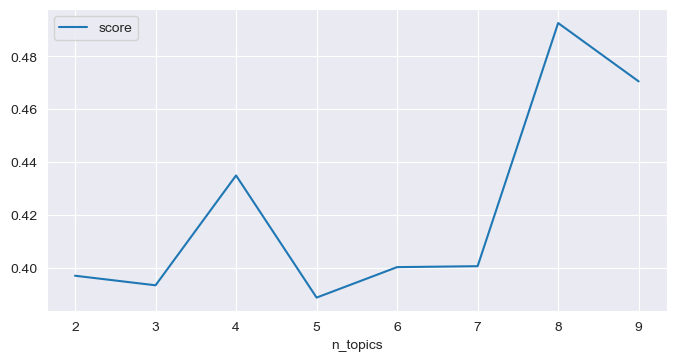

In [53]:
plot_coherence(df_lda_clusters)

Based on the plot above, we choose `n_topics = 4` as we got a noticeable increase in coherence score while not having a high cluster count.

In [54]:
optimal_k = 4
lda_model = build_optimal_lda(optimal_k, comments_tokenized, id2word, bow)

Coherence Score: 0.43489223700462276


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      269.562408 -124.803398       1        1  35.520153
1        1.782994 -295.079681       2        1  23.453377
2      220.811432 -343.832123       3        1  20.375832
3       50.533993  -76.050934       4        1  20.650640, topic_info=        Term      Freq     Total Category  logprob  loglift
121     know  2.000000  2.000000  Default  30.0000  30.0000
5      maybe  4.000000  4.000000  Default  29.0000  29.0000
83      code  2.000000  2.000000  Default  28.0000  28.0000
106     term  2.000000  2.000000  Default  27.0000  27.0000
14     could  2.000000  2.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
119   kaggle  0.712325  2.299533   Topic4  -4.4002   0.4055
4       like  0.712163  4.195641   Topic4  -4.4004  -0.1961
58      well  0.710965  5.441664   Topic4  -4.4021  -0.4578
61    kahoot  0.710682  1.774667   Topic4  -4.4025   0.6623
104  rundown  0.710568  1.774672   Topic4  -4.4026   0.6621

[206 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
76        4  0.573109      able
77        4  0.850396    absorb
93        2  0.829108  acquaint
1         1  0.277523  activity
1         2  0.277523  activity
...     ...       ...       ...
59        1  0.398199     would
59        2  0.199099     would
59        3  0.199099     would
59        4  0.199099     would
136       3  0.855505       yet

[196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [55]:
df_representative_comments = get_most_representative_documents(comments, comments_tokenized, lda_model, bow)


----------
TOPIC 1.0
Keywords: ['maybe, learning, use, give, would, explanation, scheme, grade, application, notebook']

Text 3: If I were to name a few things that can be improve in the course, it'll probably be the complexity of some of the lessons. Maybe it was because I had no formal background in linear algebra, but there were some lessons where I would get a bit lost into the explanations of some of the formulas different machine learning techniques would use. In the future, maybe it might be better to start of with an a top-down or a layman's explanation of those formulas or techniques to give a better grasp on what's supposed to be happening before giving a more in-depth explanation.
Text 12: Maybe give a brief overview of the difference of using ML applications (ex: RapidMiner, Weka) vs using jupyter notebooks.
Text 1: Probably have more time dedicated to activities with the class? Maybe something like working on a notebook from scratch as a class then proceed as groupwork/ho

#### Final Message

In [56]:
comments = df_comments['final_message'].dropna().reset_index(drop=True)
comments_cleaned = clean_and_normalize_text(comments)
comments_tokenized, id2word, bow = tokenize(comments_cleaned)

In [57]:
df_lda_clusters = find_k(comments_tokenized, id2word, bow)
df_lda_clusters

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [03:15<00:00, 24.40s/it]


,n_topics,score
0,2.0,0.599798
1,3.0,0.504050
2,4.0,0.501425
3,5.0,0.528690
4,6.0,0.601862
5,7.0,0.465732
6,8.0,0.403366
7,9.0,0.454419


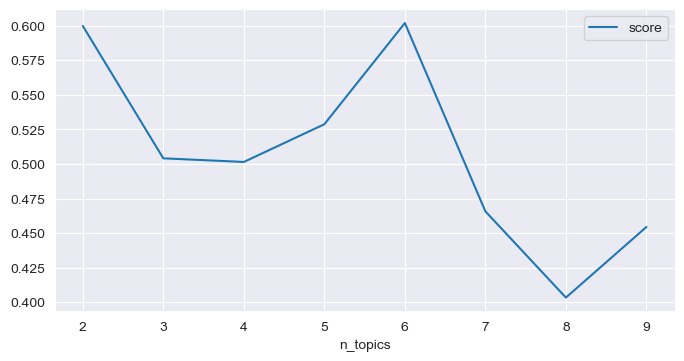

In [58]:
plot_coherence(df_lda_clusters)

Based on the plot above, we choose `n_topics = 2.`

In [59]:
optimal_k = 2
lda_model = build_optimal_lda(optimal_k, comments_tokenized, id2word, bow)

Coherence Score: 0.5997977308416087


PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
0     -60.312317  141.369629       1        1  45.753593
1      60.312561 -141.369141       2        1  54.246407, topic_info=           Term       Freq      Total Category  logprob  loglift
170      lesson   3.000000   3.000000  Default  30.0000  30.0000
147        help   3.000000   3.000000  Default  29.0000  29.0000
18   appreciate   4.000000   4.000000  Default  28.0000  28.0000
158       cause   2.000000   2.000000  Default  27.0000  27.0000
1          term  13.000000  13.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
11         hope   2.498135   4.872466   Topic2  -4.8393  -0.0564
46         make   2.501252   6.233067   Topic2  -4.8380  -0.3014
51       really   2.521602   7.594434   Topic2  -4.8299  -0.4909
10         good   2.516976   7.594229   Topic2  -4.8318  -0.4927
60   understand   2.512527   7.594031   Topic2  -4.8335  -0.4944

[136 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
32        1  0.972246           able
63        2  0.706379        advance
80        1  0.724494           also
80        2  0.362247           also
34        1  0.972300       anything
...     ...       ...            ...
225       2  0.943591  understanding
76        2  0.706384      valentine
179       1  0.726596          wanna
77        2  0.943575      wonderful
30        2  0.710318          world

[124 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [60]:
df_representative_comments = get_most_representative_documents(comments, comments_tokenized, lda_model, bow)


----------
TOPIC 1.0
Keywords: ['thank, sir, class, understand, good, really, also, make, like, lesson']

Text 16: Hello sir! I wanna start by saying thank you for this term and sorry the class was kinda dead and we had a hard time understanding things <:D I think that we learned a lot and the people who needed this class for thesis got what they came for cause we did, and I'm grateful for that, however, it was difficult to follow a lot of the lessons. I really think that if there was more class engagement, the lessons would be easier to get? Cause like you know, how other students understand the lessons is probably also how I'll understand it. Thank you so much btw for helping me throughout the term and listening to suggestions! I really hope that the next classes you teach will go better. Thank you again sir! Good luck :DDD
Text 4: Thank you sir for teaching us the entire term! Thanks for being accommodating to us and willing to take it slow for us to slowly understand the topics. A

There seems to be some clustering in the `final message` responses if we don't simply look at the top keywords determined by the model.

Topic 1 is about:
- students being grateful despite the difficult topics we have tackled
- students do not know what to ask  
- instructor is accomodating and approachable
- students wishing the instructor well on his future endeavors 
- instructor should be more authoritative

Topic 2 is about:  
- instructor is responsive to students' concerns/feedback
- students learning a lot
- notebooks are well prepared
- Valentine's day

As expected, there are overlaps between the two, but we can see some differences in a few comments.

### Favorite Messages

To end, I would like to showcase here my favorite comments:

In [61]:
df_comments['useful_aspects'][[1,9,10,13,14,16,21]].tolist()

["Probably the fact that it cleared things up about what machine learning really is and how it's not such a simple and narrow topic, but a broad and complex one at that.",
 "I think the most valuable aspect of the course was that it was able to cement a solid foundation of machine learning. Given how big the field is and how we're moving ever-closer to applying machine learning in many different fields, I think the foundations given by the course will definitely be useful and will be a huge skill set in my professional career. Another thing I found very valuable as well was that the course was able to give importance to machine learning and explain different machine learning concepts that seem very daunting and complicated at first. And although this was only an introductory course, the topics and lessons I learned over the term was definitely plenty and has further piqued my interest in the topic.",
 'Learning when or when not to use machine learning. ',
 'The collab notebooks served 

Regarding the notebooks, it actually took me more than 40 hours to develop each of them, at least for the first few topics as I had to make sure all the maths, algorithms, and codes are correct and consistent, hence the quality :)

In [62]:
df_comments['wishlist'][[2,9,14,15,20,27]].tolist()

['A heads up on what previous lessons could be applied to the subject (e.g. statistics, derivatives) and optional practice material to help the students refresh their skills.',
 "If I were to name a few things that can be improve in the course, it'll probably be the complexity of some of the lessons. Maybe it was because I had no formal background in linear algebra, but there were some lessons where I would get a bit lost into the explanations of some of the formulas different machine learning techniques would use. In the future, maybe it might be better to start of with an a top-down or a layman's explanation of those formulas or techniques to give a better grasp on what's supposed to be happening before giving a more in-depth explanation.",
 "Face-to-face classes could've been better :(",
 'At the beginning of the course, I had a hard time applying the concept to the actual code and   I was lost on how to begin coding the activity. I wish that there is a bridge on how we will be able

Yes, it would have been a lot better if it's face-to-face since we can be more interactive and I have more dimensions to utilize to effectively teach.

In [63]:
df_comments['final_message'][[4,9,11,15,19,20,22]].tolist()

["Thank you sir for teaching us the entire term! Thanks for being accommodating to us and willing to take it slow for us to slowly understand the topics. At the start I really didn't understand anything at all but now, through the projects I worked on, I was able to somewhat understand more about machine learning and how it is to be implemented. Aside from that, thank you din for being kind and open to us especially when we just talk about random stuff may it be about genshin or anything else. This really made you more approachable. Good luck in your future endeavors sir!",
 "Hi, Sir!! Thank you very much for being our prof for the past term and for teaching us a lot of new concepts and techniques within machine learning. It's sad to know that the term is quickly ending but I just want to say that I'm very grateful for the past few months and for the considerations you've given to me and the rest of the class. I really appreciate that you're constantly asking for feedback, since as a s

### Conclusions

Due to the small sample size and few token counts for most of the responses, I did not expect to get good clusters. Another reason might be due to the overall similarity of the students' feedback. For instance, the students being grateful for the many things they have learned and the learning curve for this course are very common responses. This is far from being a comprehensive study, but this is a fun way of analyzing the students' feedback .